# Learning Outcomes 
- Learn what phase kickback refers to.
- Some circuit identities. 
- Constructing CZ,CY, CH, SWAP (controlled rotations by pi)
- Arbitrary controlled rotations. 


# Phase Kickback
( Taken directly from Qiskit Textbook, with some inserted exercises )

## Contents

1. [Exploring the CNOT-Gate](#exploring-cnot)
2. [Phase Kickback](#kickback)     
    2.1 [Explaining the CNOT Circuit Identity](#explaining-identity)     
    2.2 [Kickback with the T-gate](#kickback-t-gate)    

## 1. Exploring the CNOT-Gate <a id="exploring-cnot"></a>

In the previous section, we saw some very basic results with the CNOT gate. Here we will explore some more interesting results. 

We saw that we could entangle the two qubits by placing the control qubit in the state $|+\rangle$:

$$
\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

But what happens if we put the second qubit in superposition? 

In [35]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print() instead.
from qiskit_textbook.tools import array_to_latex

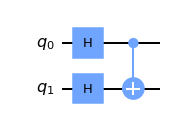

In [23]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw()

In the circuit above, we have the CNOT acting on the state:

$$ |{+}{+}\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle) $$

Since the CNOT swaps the amplitudes of $|01\rangle$ and $|11\rangle$, we see no change:

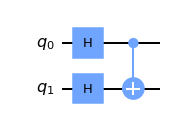

<IPython.core.display.Math object>

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


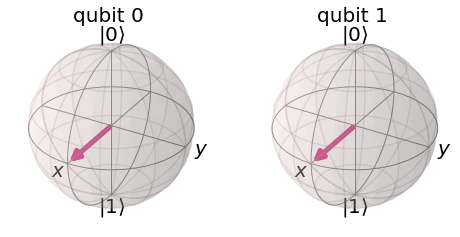

In [24]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
display(qc.draw())  # `display` is a command for Jupyter notebooks
                    # similar to `print`, but for rich content

# Let's see the result
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)

Let’s put the target qubit in the state $|-\rangle$, so it has a negative phase:

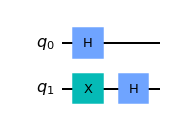

In [25]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw()

This creates the state:

$$ |{-}{+}\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle) $$

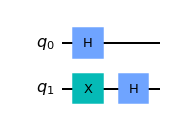

<IPython.core.display.Math object>

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


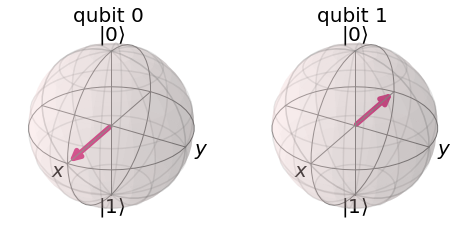

In [26]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
display(qc.draw())
# See the result
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)

## Exercise 1

What happens when we apply a H gate to both qubits in this state? 

## Answer
The First Qubit returns the |0> state and the Second one becomes |1>. The code is following:

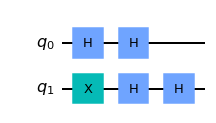

<IPython.core.display.Math object>

In [27]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.h(0)
qc.h(1)
display(qc.draw())
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)


### End of the Answer1

#If the CNOT acts on this state, we will swap the amplitudes of $|01\rangle$ and $|11\rangle$, resulting in the state:

$$
\begin{aligned}
\text{CNOT}|{-}{+}\rangle & = \tfrac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle) \\
                           & = |{-}{-}\rangle
\end{aligned}
$$


This is interesting, because it affects the state of the _control_ qubit while leaving the state of the _target_ qubit unchanged. 


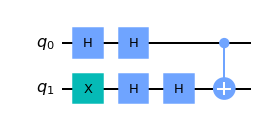

<IPython.core.display.Math object>

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


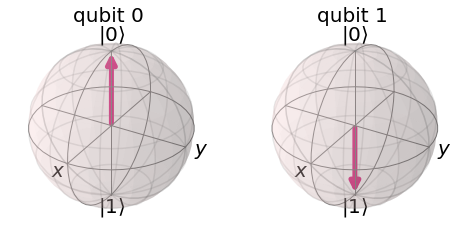

In [28]:
qc.cx(0,1)
display(qc.draw())

qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)

If you remember the H-gate transforms $|{+}\rangle \rightarrow |0\rangle$ and $|{-}\rangle \rightarrow |1\rangle$, we can see that wrapping a CNOT in H-gates has the equivalent behaviour of a CNOT acting in the opposite direction: 

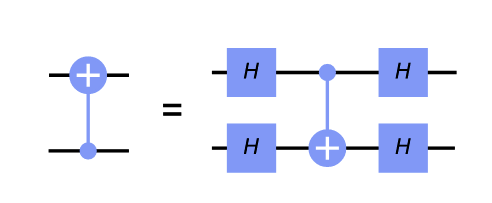

We can verify this using Qiskit's unitary simulator:

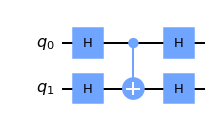

<IPython.core.display.Math object>

In [9]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw()) 

usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

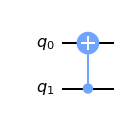

<IPython.core.display.Math object>

In [10]:
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw())

qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

## Exercise 2

Do you remember the operator whose eigenvectors was $|+\rangle$ and $|-\rangle$? What are the corresponding eigenvalues for each state ?

## Answer
The X gate 
$$
X|{-}\rangle = -|{-}\rangle
$$
$$
X|{+}\rangle = |{+}\rangle
$$

This identity is an example of _phase kickback,_ which leads us neatly on to the next section... 

## 2. Phase Kickback <a id="kickback"></a>

### 2.1 Explaining the CNOT Circuit Identity <a id="explaining-identity"></a>
In the previous section we saw this identity:

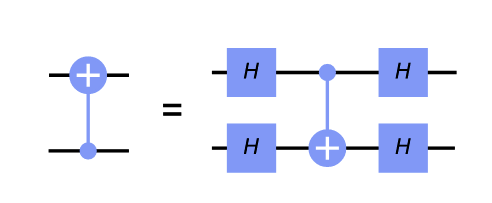

This is an example of _kickback_ (or, _phase kickback_ ) which is very important and is used in almost every quantum algorithm. Kickback is where the eigenvalue added by a gate to a qubit is ‘kicked back’ into a different qubit via a controlled operation. For example, we saw that performing an X-gate on a $|{-}\rangle$ qubit gives it the phase $-1$:

$$
X|{-}\rangle = -|{-}\rangle
$$

When our control qubit is in either $|0\rangle$ or $|1\rangle$, this phase affects the whole state, however it is a global phase and has no observable effects:

$$
\begin{aligned}
\text{CNOT}|{-}0\rangle & = |{-}\rangle \otimes |0\rangle \\
                        & = |{-}0\rangle \\
                        \quad & \\
\text{CNOT}|{-}1\rangle & = X|{-}\rangle \otimes |1\rangle \\
                        & = -|{-}\rangle \otimes |1\rangle \\
                        & = -|{-}1\rangle \\
\end{aligned}
$$

The interesting effect is when our control qubit is in superposition, the component of the control qubit that lies in the direction of $|1\rangle$ applies this phase factor to the target qubit, which in turn kicks back a relative phase to our control qubit:

$$
\begin{aligned}
\text{CNOT}|{-}{+}\rangle & = \tfrac{1}{\sqrt{2}}(\text{CNOT}|{-}0\rangle + \text{CNOT}|{-}1\rangle) \\
                           & = \tfrac{1}{\sqrt{2}}(|{-}0\rangle + X|{-}1\rangle) \\
                           & = \tfrac{1}{\sqrt{2}}(|{-}0\rangle -|{-}1\rangle) \\
\end{aligned}
$$

This can then be written as the two separable qubit states:

$$
\begin{aligned}
\text{CNOT}|{-}{+}\rangle & = |{-}\rangle \otimes \tfrac{1}{\sqrt{2}}(|{0}\rangle - |1\rangle )\\
                           & = |{-}{-}\rangle \\
\end{aligned}
$$

Wrapping the CNOT in H-gates transforms the qubits from the computational basis to the $(|+\rangle, |-\rangle)$ basis, where we see this effect. This identity is very useful in hardware, since some hardwares only allow for CNOTs in one direction between two specific qubits. We can use this identity to overcome this problem and allow CNOTs in both directions.

## Exercise 3

Do the above calculations for when the target qubit is in $|+\rangle$ state. That is, calculate the following:
- $$CNOT(0,1) |+0\rangle $$
- $$CNOT(0,1) |+1\rangle $$
- Which one would experience phase kicback, if one of them experiences at all? $ CNOT(0,1) |++ \rangle \text{ or } CNOT(0,1) |+- \rangle$  If they don't experience a phase kick back, please explain briefly why that is the case? 

## Answer


$$CNOT(0,1) |+0\rangle $$

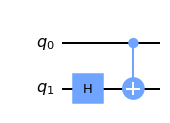

<IPython.core.display.Math object>

In [29]:
#CNOT(0,1) |+0>
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(0,1)

display(qc.draw())

qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)


$$CNOT(0,1) |+1\rangle $$

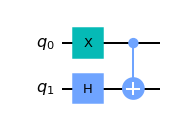

<IPython.core.display.Math object>

In [32]:
#CNOT(0,1) |+1>
qc = QuantumCircuit(2)
qc.x(0)
qc.h(1)
qc.cx(0,1)

display(qc.draw())

qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)


$$ CNOT(0,1) |++ \rangle \text{ or } CNOT(0,1) |+- \rangle $$

The second one will feel phase kickback because
$$
X|{-}\rangle = -|{-}\rangle
$$
$$
X|{+}\rangle = |{+}\rangle
$$

## Exercise 4

How did we define an arbitrary rotation around z-axis operator, $R_z(\theta)$? Write its action on $|0\rangle,|1\rangle$ and also the corresponding matrix.

## Answer
$$ R_\phi = \begin{bmatrix} 1 & 0\\ 0 & e^{i\phi} \end{bmatrix} $$
$$R_\phi |0\rangle = |0\rangle, \quad R_\phi |1\rangle = e^{i\phi} |1\rangle $$

### 2.2 Kickback with the T-gate <a id="kickback-t-gate"></a>

Let’s look at another controlled operation, the controlled-T gate: 


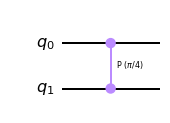

In [19]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
qc.draw()

The T-gate has the matrix:

$$
\text{T} = 
\begin{bmatrix}
1 & 0 \\
0 & e^{i\pi/4}\\
\end{bmatrix}
$$

And the controlled-T gate has the matrix:

$$
\text{Controlled-T} = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i\pi/4}\\
\end{bmatrix}
$$

We can verify this using Qiskit's unitary simulator:

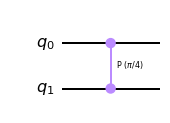

<IPython.core.display.Math object>

In [20]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Controlled-T} = \n")

More generally, we can find the matrix of any controlled-U operation using the rule:

$$
\begin{aligned}
\text{U} & = 
\begin{bmatrix}
u_{00} & u_{01} \\
u_{10} & u_{11}\\
\end{bmatrix} \\
\quad & \\
\text{Controlled-U} & = 
\begin{bmatrix}
I & 0 \\
0 & U\\
\end{bmatrix}
 = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11}\\
\end{bmatrix}
\end{aligned}
$$



## Exercise 5 

Why is Controlled-U in block diagonal form? (I'll be giving the answer during the session)

## Answer
Becuse It represent tensor product of $ I \otimes U $ and this means
$$ I\otimes U = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \otimes \begin{bmatrix} u_{00} & u_{01} \\ u_{10} & u_{11} \end{bmatrix} $$
and for simplicity we represent this like following
$$ 
\begin{bmatrix}
I & 0 \\
0 & U\\
\end{bmatrix} $$

or, using Qiskit's qubit ordering:

$$
\text{Controlled-U} =  
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & u_{00} & 0 & u_{01} \\
0 & 0 & 1 & 0 \\
0 & u_{10} & 0 & u_{11}\\
\end{bmatrix}
$$


If we apply the T-gate to a qubit in the state $|1\rangle$, we add a phase of $e^{i\pi/4}$ to this qubit:

$$
T|1\rangle = e^{i\pi/4}|1\rangle
$$

This is _global phase_ and is unobservable. But if we control this operation using another qubit in the $|{+}\rangle$ state, the phase is no longer global but relative, which changes the _relative phase_ in our control qubit:

$$
\begin{aligned}
|1{+}\rangle & = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \\
& = \tfrac{1}{\sqrt{2}}(|10\rangle + |11\rangle) \\
& \\
\text{Controlled-T}|1{+}\rangle & = \tfrac{1}{\sqrt{2}}(|10\rangle + e^{i\pi/4}|11\rangle) \\
& \\
& = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + e^{i\pi/4}|1\rangle)
\end{aligned}
$$

This has the effect of rotating our control qubit around the Z-axis of the Bloch sphere, while leaving the target qubit unchanged. Let's see this in Qiskit:

## Exercise 6 

Explain why do we represent Controlled-U differently in Qiskit?


## Answer
Because in Qiskit bit ordering is different, most significant bit (MSB) on the left to the least significant bit (LSB) on the right (big-endian).

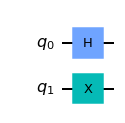

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


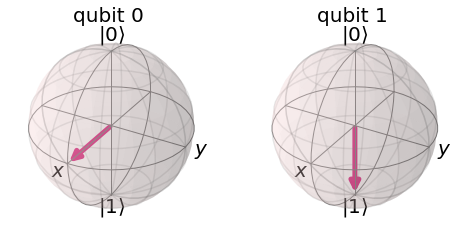

In [17]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw())
# See Results:
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

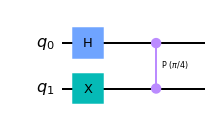

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


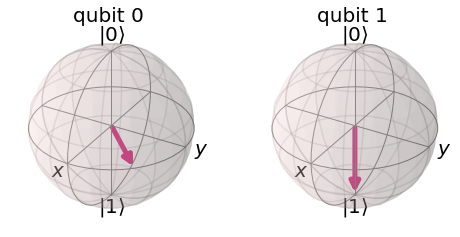

In [22]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
# Add Controlled-T
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

We can see the leftmost qubit has been rotated by $\pi/4$ around the Z-axis of the Bloch sphere as expected. After exploring this behaviour, it may become clear why Qiskit draws the controlled-Z rotation gates in this symmetrical fashion (two controls instead of a control and a target). There is no clear control or target qubit for all cases.

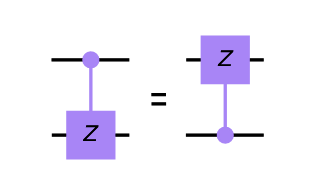

You can do the exercises below if you like, but they are not part of the homework exercises. 

### Quick Exercises:


1.What would be the resulting state of the control qubit (q0) if the target qubit (q1) was in the state $|0\rangle$? (as shown in the circuit below)? Use Qiskit to check your answer.

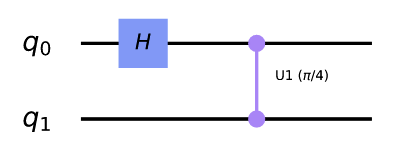

2.What would happen to the control qubit (q0) if the if the target qubit (q1) was in the state $|1\rangle$, and the circuit used a controlled-Sdg gate instead of the controlled-T (as shown in the circuit below)?

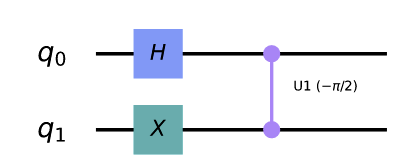


3.What would happen to the control qubit (q0) if it was in the state $|1\rangle$ instead of the state $|{+}\rangle$ before application of the controlled-T (as shown in the circuit below)?

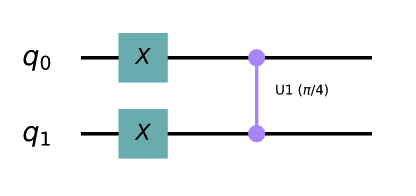


## Exercise 7

Prove that if we applying CZ(0,1) and CZ(1,0) to $|1+\rangle$ produce the same states. You can either use LaTeX feature of Jupyter Markdown cells, or just write it on a piece of paper, take its picture and upload it below.

## Answer
$$
CZ(0,1) = \begin{bmatrix}1 & 0 & 0 & 0 \\0 & 1 & 0 & 0 \\0 & 0 & 1 & 0 \\0 & 0 & 0 & -1\\\end{bmatrix} (|1\rangle \otimes |{+}\rangle) = |1{-}\rangle$$
$$ CZ(1,0) = \begin{bmatrix}1 & 0 & 0 & 0 \\0 & 1 & 0 & 0 \\0 & 0 & 1 & 0 \\0 & 0 & 0 & -1\\\end{bmatrix} (|+\rangle \otimes |{1}\rangle) = |1{-}\rangle
$$

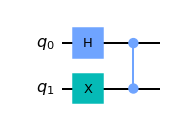

<IPython.core.display.Math object>

In [41]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cz(0,1)
display(qc.draw())
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)

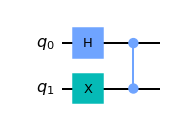

<IPython.core.display.Math object>

In [42]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cz(1,0)
display(qc.draw())
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)

This below part is also taken directly from Qiskit textbook, with some simple exercises between the lines. However, this is not the whole notebook. If you are interested in learning more about them you should check Qiskit Textbook!!


# Basic Circuit Identities

When we program quantum computers, our aim is always to build useful quantum circuits from the basic building blocks. But sometimes, we might not have all the basic building blocks we want. In this section, we'll look at how we can transform basic gates into each other, and how to use them to build some gates that are slightly more complex \(but still pretty basic\).

Many of the techniques discussed in this chapter were first proposed in a paper by Barenco and coauthors in 1995 [1].

## Contents

1. [Making a Controlled-Z from a CNOT](#c-from-cnot)
2. [Swapping Qubits](#swapping) 
3. [Controlled Rotations](#controlled-rotations)
4. [The Toffoli](#ccx)
5. [Arbitrary rotations from H and T](#arbitrary-rotations)
6. [References](#references)

## 1. Making a Controlled-Z from a CNOT <a id="c-from-cnot"></a>

The controlled-Z or `cz` gate is another well-used two-qubit gate. Just as the CNOT applies an $X$ to its target qubit whenever its control is in state $|1\rangle$, the controlled-$Z$ applies a $Z$ in the same case. In Qiskit it can be invoked directly with

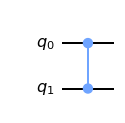

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
from math import pi
qc = QuantumCircuit(2)
c = 0
t = 1
# a controlled-Z
qc.cz(c,t)
qc.draw()

where c and t are the control and target qubits. In IBM Q devices, however, the only kind of two-qubit gate that can be directly applied is the CNOT. We therefore need a way to transform one to the other.

The process for this is quite simple. We know that the Hadamard transforms the states $|0\rangle$ and $|1\rangle$ to the states $|+\rangle$ and $|-\rangle$ respectively. We also know that the effect of the $Z$ gate on the states $|+\rangle$ and $|-\rangle$ is the same as that for $X$ on the state $|0\rangle$ and $|1\rangle$. From this reasoning, or from simply multiplying matrices, we find that

$$
H X H = Z,\\\\
H Z H = X.
$$

The same trick can be used to transform a CNOT into a controlled-$Z$. All we need to do is precede and follow the CNOT with a Hadamard on the target qubit. This will transform any $X$ applied to that qubit into a $Z$.

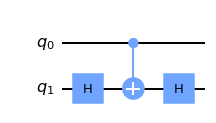

In [44]:
qc = QuantumCircuit(2)
# also a controlled-Z
qc.h(t)
qc.cx(c,t)
qc.h(t)
qc.draw()

More generally, we can transform a single CNOT  into a controlled version of any rotation around the Bloch sphere by an angle $\pi$, by simply preceding and following it with the correct rotations. For example, a controlled-$Y$:

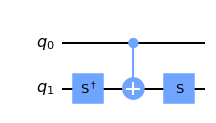

In [45]:
qc = QuantumCircuit(2)
# a controlled-Y
qc.sdg(t)
qc.cx(c,t)
qc.s(t)
qc.draw()

and a controlled-$H$:

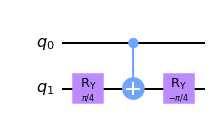

In [46]:
qc = QuantumCircuit(2)
# a controlled-H
qc.ry(pi/4,t)
qc.cx(c,t)
qc.ry(-pi/4,t)
qc.draw()

## Exercise 8

- Write down the action of $S$ and $S^{\dagger}$ on the computational basis states.
- Write the corresponding matrix.
- Write down the matrix for the Controlled-Y operation and compare it with the unitary transformation produced by the proposed circuit. Beware of the little-endian representation!

## Answer

In [47]:
# Your code creating, designing the circuit above, and printing the unitary transformation produced.

They makes quarter turns of the Bloch sphere around the z axis, $$\text{S makes } \pi/2 \text{ and }  S^\dagger \text{ makes }  -\pi/2 \text{ rotation } $$

$$
S = \begin{bmatrix} 1&0 \\\\ 0&i \end{bmatrix}, \, \, \, \, S^\dagger = \begin{bmatrix} 1&0 \\\\ 0&-i \end{bmatrix}.
$$

In [10]:
# the actual matrix for the Controlled-Y operation
from qiskit import Aer,assemble
from qiskit_textbook.tools import array_to_latex
qc = QuantumCircuit(2)
# a controlled-Y
qc.sdg(0)
qc.cx(1,0)
qc.s(0)
qc.draw()

unisim = Aer.get_backend('unitary_simulator')
unitary = unisim.run(assemble(qc)).result().get_unitary()
array_to_latex(unitary,pretext="CY(0,1)= ")

<IPython.core.display.Math object>

In [8]:
# the unitary transformation produced by the proposed circuit
from qiskit import Aer,assemble
from qiskit_textbook.tools import array_to_latex
qc = QuantumCircuit(2)
# a controlled-Y
qc.sdg(1)
qc.cx(0,1)
qc.s(1)
qc.draw()

unisim = Aer.get_backend('unitary_simulator')
unitary = unisim.run(assemble(qc)).result().get_unitary()
array_to_latex(unitary,pretext="CY(0,1)= ")


<IPython.core.display.Math object>

The Quiskit implementation couses the differance.

## 2. Swapping Qubits <a id="swapping"></a>

In [48]:
a = 0
b = 1

Sometimes we need to move information around in a quantum computer. For some qubit implementations, this could be done by physically moving them. Another option is simply to move the state between two qubits. This is done by the SWAP gate.

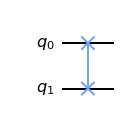

In [49]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.swap(a,b)
qc.draw()

The command above directly invokes this gate, but let's see how we might make it using our standard gate set. For this, we'll need to consider a few examples.

First, we'll look at the case that qubit a is in state $|1\rangle$ and qubit b is in state $|0\rangle$. For this we'll apply the following gates:

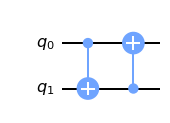

In [12]:
qc = QuantumCircuit(2)
# swap a 1 from a to b
qc.cx(a,b) # copies 1 from a to b
qc.cx(b,a) # uses the 1 on b to rotate the state of a to 0
qc.draw()

This has the effect of putting qubit b in state $|1\rangle$ and qubit a in state $|0\rangle$. In this case at least, we have done a SWAP.

Now let's take this state and SWAP back to the original one. As you may have guessed, we can do this with the reverse of the above process:

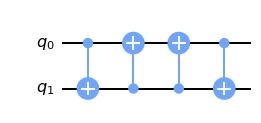

In [13]:
# swap a q from b to a
qc.cx(b,a) # copies 1 from b to a
qc.cx(a,b) # uses the 1 on a to rotate the state of b to 0
qc.draw()

Note that in these two processes, the first gate of one would have no effect on the initial state of the other. For example, when we swap the $|1\rangle$ b to a, the first gate is `cx(b,a)`. If this were instead applied to a state where no $|1\rangle$ was initially on b, it would have no effect.

Note also that for these two processes, the final gate of one would have no effect on the final state of the other. For example, the final `cx(b,a)` that is required when we swap the $|1\rangle$ from a to b has no effect on the state where the $|1\rangle$ is not on b.

With these observations, we can combine the two processes by adding an ineffective gate from one onto the other. For example,

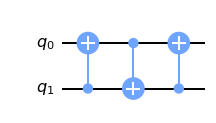

In [14]:
qc = QuantumCircuit(2)
qc.cx(b,a)
qc.cx(a,b)
qc.cx(b,a)
qc.draw()

We can think of this as a process that swaps a $|1\rangle$ from a to b, but with a useless `qc.cx(b,a)` at the beginning. We can also think of it as a process that swaps a $|1\rangle$ from b to a, but with a useless `qc.cx(b,a)` at the end. Either way, the result is a process that can do the swap both ways around.

It also has the correct effect on the $|00\rangle$ state. This is symmetric, and so swapping the states should have no effect. Since the CNOT gates have no effect when their control qubits are $|0\rangle$, the process correctly does nothing.

The $|11\rangle$ state is also symmetric, and so needs a trivial effect from the swap. In this case, the first CNOT gate in the process above will cause the second to have no effect, and the third undoes the first. Therefore, the whole effect is indeed trivial.

We have thus found a way to decompose SWAP gates into our standard gate set of single-qubit rotations and CNOT gates.

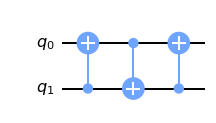

In [15]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.cx(b,a)
qc.cx(a,b)
qc.cx(b,a)
qc.draw()

It works for the states $|00\rangle$, $|01\rangle$, $|10\rangle$ and $|11\rangle$, and if it works for all the states in the computational basis, it must work for all states generally. This circuit therefore swaps all possible two-qubit states.

The same effect would also result if we changed the order of the CNOT gates:

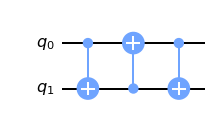

In [16]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.cx(a,b)
qc.cx(b,a)
qc.cx(a,b)
qc.draw()

This is an equally valid way to get the SWAP gate.

The derivation used here was very much based on the z basis states, but it could also be done by thinking about what is required to swap qubits in states $|+\rangle$ and $|-\rangle$. The resulting ways of implementing the SWAP gate will be completely equivalent to the ones here.

#### Quick Exercise:
- Find different circuit that swaps qubits in the states $|+\rangle$ and $|-\rangle$, and show this is equivalent to the circuit shown above.

## Exercise 9

Solve the above quick exercise:

-Find different circuit that swaps qubits in the states |+⟩ and |−⟩, and show this is equivalent to the circuit shown above.


## Answer

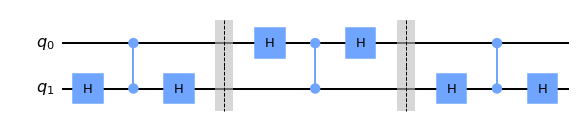

In [14]:
qc = QuantumCircuit(2)
qc.h(t)
qc.cz(c,t)
qc.h(t)
qc.barrier()
qc.h(c)
qc.cz(t,c)
qc.h(c)
qc.barrier()
qc.h(t)
qc.cz(c,t)
qc.h(t)
qc.draw()

It is same as adding Cnot to the circuit because :
$$ HCZH = CX$$

## 3. Controlled Rotations <a id="controlled-rotations"></a>

We have already seen how to build controlled $\pi$ rotations from a single CNOT gate. Now we'll look at how to build any controlled rotation.

First, let's consider arbitrary rotations around the y axis. Specifically, consider the following sequence of gates.

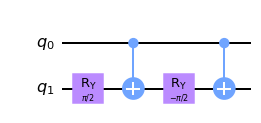

In [17]:
qc = QuantumCircuit(2)
theta = pi # theta can be anything (pi chosen arbitrarily)
qc.ry(theta/2,t)
qc.cx(c,t)
qc.ry(-theta/2,t)
qc.cx(c,t)
qc.draw()

If the control qubit is in state $|0\rangle$, all we have here is a $R_y(\theta/2)$ immediately followed by its inverse, $R_y(-\theta/2)$. The end effect is trivial. If the control qubit is in state $|1\rangle$, however, the `ry(-theta/2)` is effectively preceded and followed by an X gate. This has the effect of flipping the direction of the y rotation and making a second $R_y(\theta/2)$. The net effect in this case is therefore to make a controlled version of the rotation $R_y(\theta)$. 

This method works because the x and y axis are orthogonal, which causes the x gates to flip the direction of the rotation. It therefore similarly works to make a controlled $R_z(\theta)$. A controlled $R_x(\theta)$ could similarly be made using CNOT gates.

We can also make a controlled version of any single-qubit rotation, $V$. For this we simply need to find three rotations A, B and C, and a phase $\alpha$ such that

$$
ABC = I, ~~~e^{i\alpha}AZBZC = V
$$

We then use controlled-Z gates to cause the first of these relations to happen whenever the control is in state $|0\rangle$, and the second to happen when the control is state $|1\rangle$. An $R_z(2\alpha)$ rotation is also used on the control to get the right phase, which will be important whenever there are superposition states.

In [18]:
A = Gate('A', 1, [])
B = Gate('B', 1, [])
C = Gate('C', 1, [])
alpha = 1 # arbitrarily define alpha to allow drawing of circuit

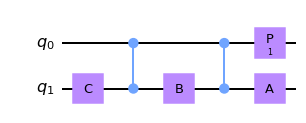

In [19]:
qc = QuantumCircuit(2)
qc.append(C, [t])
qc.cz(c,t)
qc.append(B, [t])
qc.cz(c,t)
qc.append(A, [t])
qc.p(alpha,c)
qc.draw()

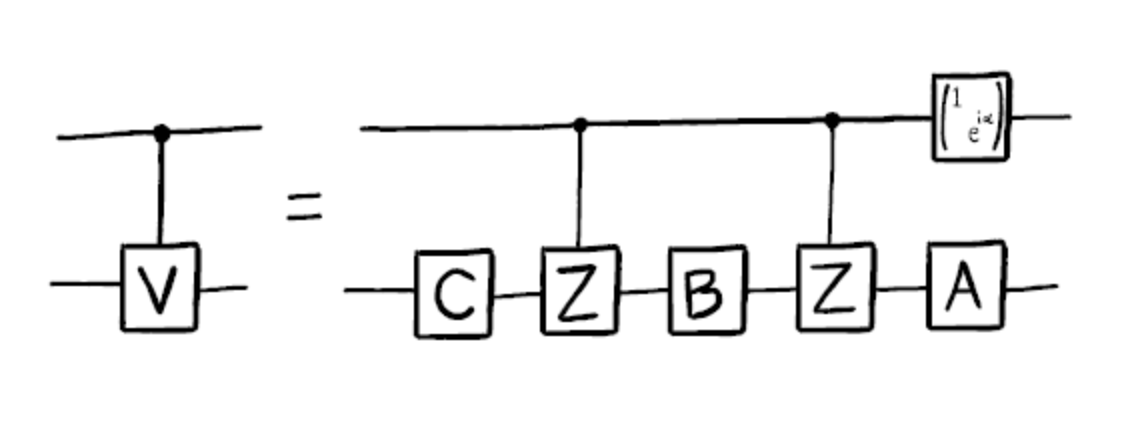

Here `A`, `B` and `C` are gates that implement $A$ , $B$ and $C$, respectively.

## 6. References <a id="references"></a>

[1] [Barenco, *et al.* 1995](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.52.3457?cm_mc_uid=43781767191014577577895&cm_mc_sid_50200000=1460741020)

[2] [Shende and Markov, 2009](http://dl.acm.org/citation.cfm?id=2011799)